# Internal Layering Tests
This notebook tests the accuracy of the model for various conditions involving sub-layering. This is all done through internal validation, and can be used to assess the capabilities of different cell-integration techniques.


## Test 1: Single Scatter Limb Viewing Geometry

Here we construct a limb viewing geometry in single scatter mode for a few different solar zenith angles and wavelengths


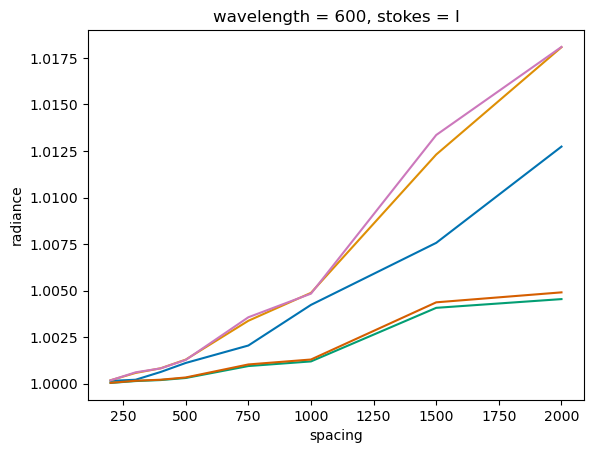

In [1]:
import sasktran2 as sk
import numpy as np
import xarray as xr
import seaborn as sns 

colors = sns.color_palette('colorblind')


def run_for_condition(cos_sza: float, grid_spacing: float):
    config = sk.Config()
    config.multiple_scatter_source = sk.MultipleScatterSource.NoSource

    model_geometry = sk.Geometry1D(cos_sza=cos_sza,
                                    solar_azimuth=0,
                                    earth_radius_m=6372000,
                                    altitude_grid_m=np.arange(0, 100001, grid_spacing),
                                    interpolation_method=sk.InterpolationMethod.LinearInterpolation,
                                    geometry_type=sk.GeometryType.Spherical)

    viewing_geo = sk.ViewingGeometry()

    for alt in [10000, 20000, 30000, 40000, 50000, 60000]:
        ray = sk.TangentAltitudeSolar(tangent_altitude_m=alt,
                                        relative_azimuth=0,
                                        observer_altitude_m=200000,
                                        cos_sza=0.6)
        viewing_geo.add_ray(ray)

    wavel = np.array([280, 310, 350, 450, 600])

    atmosphere = sk.Atmosphere(model_geometry, config, wavelengths_nm=wavel, calculate_derivatives=False)

    sk.climatology.us76.add_us76_standard_atmosphere(atmosphere)

    atmosphere['rayleigh'] = sk.constituent.Rayleigh()
    atmosphere['ozone'] = sk.climatology.mipas.constituent("O3", sk.optical.O3DBM())
    atmosphere['no2'] = sk.climatology.mipas.constituent("NO2", sk.optical.NO2Vandaele())

    engine = sk.Engine(config, model_geometry, viewing_geo)

    return engine.calculate_radiance(atmosphere)

true_radiance = run_for_condition(0.6, 100)

TEST_SPACINGS = np.array([200, 300, 400, 500, 750, 1000, 1500, 2000])

results = []
for spacing in TEST_SPACINGS:
    res = run_for_condition(0.6, spacing)
    res['spacing'] = spacing
    results.append(res)

results = xr.concat(results, dim='spacing')


for widx in range(len(results.wavelength)):
    (results / true_radiance)['radiance'].isel(stokes=0, wavelength=widx, los=4).plot(color = colors[widx])

# Test 2: Single Scatter, Nadir Viewing, Spherical

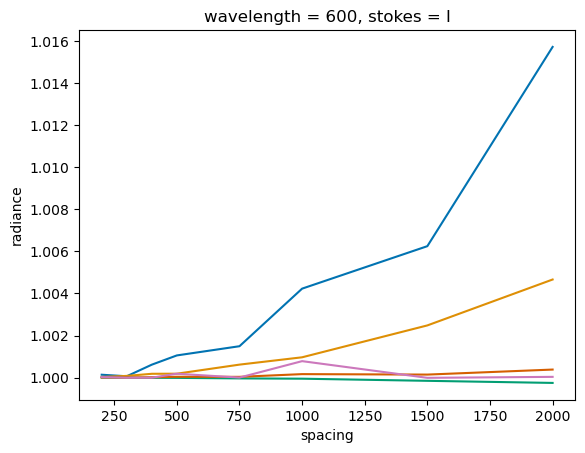

In [2]:
def run_for_condition(cos_sza: float, grid_spacing: float):
    config = sk.Config()
    config.multiple_scatter_source = sk.MultipleScatterSource.NoSource

    model_geometry = sk.Geometry1D(cos_sza=cos_sza,
                                    solar_azimuth=0,
                                    earth_radius_m=6372000,
                                    altitude_grid_m=np.arange(0, 100001, grid_spacing),
                                    interpolation_method=sk.InterpolationMethod.LinearInterpolation,
                                    geometry_type=sk.GeometryType.Spherical)

    viewing_geo = sk.ViewingGeometry()

    ray = sk.GroundViewingSolar(cos_sza, 0, 0.4, 200000)
    viewing_geo.add_ray(ray)

    wavel = np.array([280, 310, 350, 450, 600])

    atmosphere = sk.Atmosphere(model_geometry, config, wavelengths_nm=wavel, calculate_derivatives=False)

    sk.climatology.us76.add_us76_standard_atmosphere(atmosphere)

    atmosphere['rayleigh'] = sk.constituent.Rayleigh()
    atmosphere['ozone'] = sk.climatology.mipas.constituent("O3", sk.optical.O3DBM())
    atmosphere['no2'] = sk.climatology.mipas.constituent("NO2", sk.optical.NO2Vandaele())

    engine = sk.Engine(config, model_geometry, viewing_geo)

    return engine.calculate_radiance(atmosphere)

csz = 0.1
true_radiance = run_for_condition(csz, 100)

TEST_SPACINGS = np.array([200, 300, 400, 500, 750, 1000, 1500, 2000])

results = []
for spacing in TEST_SPACINGS:
    res = run_for_condition(csz, spacing)
    res['spacing'] = spacing
    results.append(res)

results = xr.concat(results, dim='spacing')


for widx in range(len(results.wavelength)):
    (results / true_radiance)['radiance'].isel(stokes=0, wavelength=widx, los=0).plot(color = colors[widx])

## Test 3: Single Satter, Nadir Viewing, Plane Parallel, Linear Variation

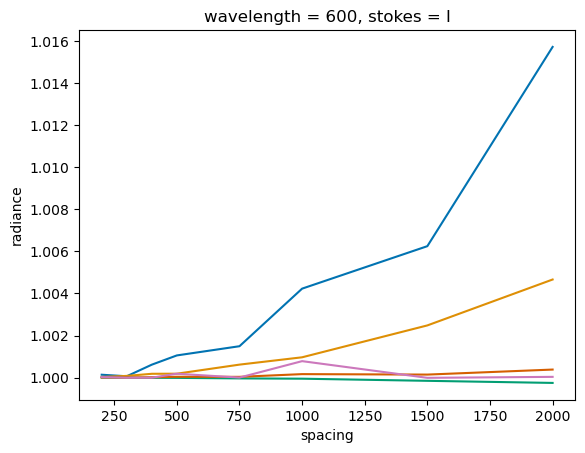

In [3]:
def run_for_condition(cos_sza: float, grid_spacing: float):
    config = sk.Config()
    config.multiple_scatter_source = sk.MultipleScatterSource.NoSource

    model_geometry = sk.Geometry1D(cos_sza=cos_sza,
                                    solar_azimuth=0,
                                    earth_radius_m=6372000,
                                    altitude_grid_m=np.arange(0, 100001, grid_spacing),
                                    interpolation_method=sk.InterpolationMethod.LinearInterpolation,
                                    geometry_type=sk.GeometryType.PlaneParallel)

    viewing_geo = sk.ViewingGeometry()

    ray = sk.GroundViewingSolar(cos_sza, 0, 0.4, 200000)
    viewing_geo.add_ray(ray)

    wavel = np.array([280, 310, 350, 450, 600])

    atmosphere = sk.Atmosphere(model_geometry, config, wavelengths_nm=wavel, calculate_derivatives=False)

    sk.climatology.us76.add_us76_standard_atmosphere(atmosphere)

    atmosphere['rayleigh'] = sk.constituent.Rayleigh()
    atmosphere['ozone'] = sk.climatology.mipas.constituent("O3", sk.optical.O3DBM())
    atmosphere['no2'] = sk.climatology.mipas.constituent("NO2", sk.optical.NO2Vandaele())

    engine = sk.Engine(config, model_geometry, viewing_geo)

    return engine.calculate_radiance(atmosphere)

csz = 0.1
true_radiance = run_for_condition(csz, 100)

TEST_SPACINGS = np.array([200, 300, 400, 500, 750, 1000, 1500, 2000])

results = []
for spacing in TEST_SPACINGS:
    res = run_for_condition(csz, spacing)
    res['spacing'] = spacing
    results.append(res)

results = xr.concat(results, dim='spacing')


for widx in range(len(results.wavelength)):
    (results / true_radiance)['radiance'].isel(stokes=0, wavelength=widx, los=0).plot(color = colors[widx])

## Test 4: Single Satter, Nadir Viewing, Plane Parallel, Shell Variation

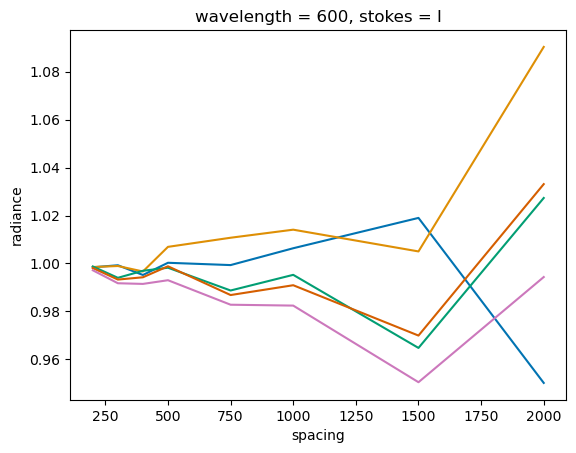

In [4]:
def run_for_condition(cos_sza: float, grid_spacing: float):
    config = sk.Config()
    config.multiple_scatter_source = sk.MultipleScatterSource.NoSource

    model_geometry = sk.Geometry1D(cos_sza=cos_sza,
                                    solar_azimuth=0,
                                    earth_radius_m=6372000,
                                    altitude_grid_m=np.arange(0, 100001, grid_spacing),
                                    interpolation_method=sk.InterpolationMethod.ShellInterpolation,
                                    geometry_type=sk.GeometryType.PlaneParallel)

    viewing_geo = sk.ViewingGeometry()

    ray = sk.GroundViewingSolar(cos_sza, 0, 0.4, 200000)
    viewing_geo.add_ray(ray)

    wavel = np.array([280, 310, 350, 450, 600])

    atmosphere = sk.Atmosphere(model_geometry, config, wavelengths_nm=wavel, calculate_derivatives=False)

    sk.climatology.us76.add_us76_standard_atmosphere(atmosphere)

    atmosphere['rayleigh'] = sk.constituent.Rayleigh()
    atmosphere['ozone'] = sk.climatology.mipas.constituent("O3", sk.optical.O3DBM())
    atmosphere['no2'] = sk.climatology.mipas.constituent("NO2", sk.optical.NO2Vandaele())

    engine = sk.Engine(config, model_geometry, viewing_geo)

    return engine.calculate_radiance(atmosphere)

csz = 0.1
true_radiance = run_for_condition(csz, 100)

TEST_SPACINGS = np.array([200, 300, 400, 500, 750, 1000, 1500, 2000])

results = []
for spacing in TEST_SPACINGS:
    res = run_for_condition(csz, spacing)
    res['spacing'] = spacing
    results.append(res)

results = xr.concat(results, dim='spacing')


for widx in range(len(results.wavelength)):
    (results / true_radiance)['radiance'].isel(stokes=0, wavelength=widx, los=0).plot(color = colors[widx])